In [1]:
import pandas as pd
from datetime import datetime, timedelta
import csv
import mysql.connector
mydb = mysql.connector.connect(
  host="TW100103289",       # 数据库主机地址
#    host="TW100102221",       # 数据库主机地址
  user="root",    # 数据库用户名
  passwd="l5cv0",   # 数据库密码
  database="l5cv0",auth_plugin='mysql_native_password'
)



In [2]:
Update_daytime=150
model='All'
chartid = 'B80E4/PEP1/ADI/AHVA_V1_CD1'
abbrno ='C6'



In [3]:
endtime = datetime.now() - timedelta(days=2/24)
starttime = datetime.now() - timedelta(days=2/24)- timedelta(days=Update_daytime) 
Update_time = " AND t.REPORTTIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.REPORTTIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"

In [4]:
Update_time

" AND t.REPORTTIME > '2020-03-03 06:35:23' AND t.REPORTTIME < '2020-07-31 06:35:23'"

In [5]:
Sqla =  " select t.REPORTTIME  AS  xml_mea_time,"
Sqla = Sqla + " t.INFORVALUE22  AS  xml_mea_tool,"
Sqla = Sqla + " t.INFORVALUE17 AS xml_start_time,"
#Sqla = Sqla + " t.INFORVALUE10  AS  xml_tool_id,"
Sqla = Sqla + " t.INFORVALUE5 AS  XML_SHEET_ID,"
Sqla = Sqla + " t.CHARTID,"
Sqla = Sqla + " t.MONITORITEMVALUE AS Y"
Sqla = Sqla + " from l5caryspch_spchis t"
#Sqla = Sqla + " where t.CHARTID = 'B15H6/PEP1/ADI/AHVA_V1_CD1'"
Sqla = Sqla + " where 1 = 1"
Sqla = Sqla + Update_time
#Sqla = Sqla + " and t.REPORTTIME > '2019-11-20 08:00:00'"
Sqla = Sqla + " and t.GRAPHTYPE ='X'"
Sqla = Sqla + " and t.INFORVALUE22 like 'ABMOV%'"
#Sqla = Sqla + " and t.INFORVALUE10 = 'ABIEXL00'"
Sqla = Sqla + " and t.INFORVALUE24 ='GL=ADC'"
Sqla = Sqla + " and t.MONITOR_ITEM_NAME = 'ASVA_V1_CD1_AVE'"
Sqla = Sqla + " and t.CHARTID like '%1/ADI%1'"



df = pd.read_sql_query(Sqla, mydb)


df_Y = df[['XML_SHEET_ID',
           'CHARTID',
           'Y']]

In [6]:
#Update_daytime=1/24

endtime = datetime.now() - timedelta(days=1/24)
starttime = datetime.now() - timedelta(days=1/24)- timedelta(days=Update_daytime) 
#Update_time = " AND t.REPORTTIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.REPORTTIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"
Update_time = " AND t.XML_START_TIME > '" +'{date:%Y-%m-%d %H:%M:%S}'.format( date=starttime) + "' AND t.XML_START_TIME < '" + '{date:%Y-%m-%d %H:%M:%S}'.format( date=endtime)  + "'"


Sqla =  " select t.* "
Sqla = Sqla + " from svm_cd_r2r t"
Sqla = Sqla + " where 1=1"
Sqla = Sqla + " and t.XML_OP_ID = 'GL-IEX'"
#Sqla = Sqla + " and t.XML_ABBR_NO = '6P'"
#Sqla = Sqla + " and t.XML_TOOL_ID = 'ABIEXL10'"
Sqla = Sqla + Update_time




In [7]:
df = pd.read_sql_query(Sqla, mydb)

In [8]:
df = df.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )


# In[6]:


df = df.drop_duplicates('XML_SHEET_ID')


# In[7]:


df_X=df[['XML_SHEET_ID','XML_MODEL_NO' ,
       'XML_TOOL_ID','XML_ABBR_NO',
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG']]


In [9]:
df = pd.merge(df_Y , df_X, on = 'XML_SHEET_ID', how = 'left')

In [10]:
df = df.dropna(axis = 0, subset = ['LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG'] )

df = df.drop_duplicates('XML_SHEET_ID')

df=df[['XML_SHEET_ID','XML_MODEL_NO',
       'XML_TOOL_ID','XML_ABBR_NO','CHARTID',  
       'LC_DISPENSQNT',
       'LC_DPSSPDSET1', 'LC_DPSSPDSET2', 'LC_DPSSPDSET3', 'LC_NZLSPDMENT',
       'LC_COTPRESS', 'LC_TEMP', 'LC_HUM', 'SHP_TEMP1', 'SHP_TEMP2',
       'SCP_TEMP', 'SB_PROCID', 'SHP_USEDID', 'SCP_USEDID', 'SHP_TEMP3',
       'SHP_TEMP4', 'SHP_TEMP5', 'SHP_TEMP6', 'DV_DEVPRCTM', 'DV_SP1PMPFLW',
       'DV_ENNZL1FLWRT', 'DV_ENNZL2FLWRT', 'DV_SP3PMPFLW', 'DV_CIRPMPFLW',
       'DV_TANKATEMP', 'DV_NRCONCENT1', 'DV_NACONCENT1', 'DV_PMPFLWR1',
       'DV_ENSWFLWRTR1', 'DV_HSPPRSR1', 'DV_PMPFLWR2', 'DV_DWSPFLWRTR2',
       'DV_ARFLWRTUP', 'DV_ARFLWRTLW', 'DV_ENNZL3FLWRT', 'SLOTZFCUS11',
       'SLOTZFCUS21', 'SLOTZFCUS31', 'SLOTZFCUS41', 'LPMAX', 'LPMIN', 'LPAVE',
       'TMPM', 'TMPP', 'HUMM', 'HUMP', 'PRESM', 'PRESP', 'AIRD', 'AIRCLN',
       'AIRCOL1', 'AIRCOL2', 'AIRN2', 'VAC', 'LPILL', 'LPILR', 'LPILA', 'LPL',
       'LPR', 'SCANSPEED', 'ILLM_AVG','Y']]




In [ ]:
#path = 'C:\\Users\\2007018\\Desktop\\offline0721.csv'

In [ ]:
#path

In [ ]:
#df.to_csv(path, encoding = 'utf-8', index = False)
#df.to_csv('D:\CD_R2R\B156HAN02_IEXL20_Offline.csv', encoding = 'utf-8', index = False)

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score

In [13]:
df = pd.read_csv("offline0721.csv")
df

XML_SHEET_ID XML_MODEL_NO XML_TOOL_ID XML_ABBR_NO  \
0      6P0B3504A     V15H6-Y3    ABIEXL10          6P   
1      C60B34T9A      V80E4-Y    ABIEXL10          C6   
2      C60B34T94      V80E4-Y    ABIEXL10          C6   
3      6R0B35C1A      V15A2-Y    ABIEXL10          6R   
4      6R0B35C14      V15A2-Y    ABIEXL10          6R   
..           ...          ...         ...         ...   
906    9N0B7BM94      V17H4-Y    ABIEXJ10          9N   
907    6P0B7BZ0A     V15H6-Y3    ABIEXL10          6P   
908    6P0B7BZ04     V15H6-Y3    ABIEXL10          6P   
909    9N0B7CH5A      V17H4-Y    ABIEXJ10          9N   
910    9N0B7CH54      V17H4-Y    ABIEXJ10          9N   

                          CHARTID  LC_DISPENSQNT  LC_DPSSPDSET1  \
0      B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0   
1      B80E4/PEP1/ADI/AHVA_V1_CD1           15.4            3.5   
2      B80E4/PEP1/ADI/AHVA_V1_CD1           15.4            3.5   
3    B156HAN02.0_4PEP/M1/ADI/CD01           15.4            3.5   
4    B156HAN02.0_4PEP/M1/ADI/CD01           15.4            3.5   
..                            ...            ...            ...   
906    B17H4/PEP1/ADI/AHVA_V1_CD1           15.6            1.5   
907    B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0   
908    B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0   
909    B17H4/PEP1/ADI/AHVA_V1_CD1           15.6            1.5   
910    B17H4/PEP1/ADI/AHVA_V1_CD1           15.6            1.5   

     LC_DPSSPDSET2  LC_DPSSPDSET3  LC_NZLSPDMENT  ...  AIRN2  VAC  LPILL  \
0             1.08           1.06           80.0  ...    0.7  -86   3359   
1             0.95           0.94           79.9  ...    0.7  -86   3308   
2             0.95           0.94           80.0  ...    0.7  -86   3308   
3             0.95           0.94           79.9  ...    0.7  -86   3308   
4             0.95           0.94           79.9  ...    0.7  -86   3311   
..             ...            ...            ...  ...    ...  ...    ...   
906           0.97           0.95           80.0  ...    0.7  -89   3267   
907           1.08           1.06           80.0  ...    0.7  -86   3345   
908           1.08           1.06           79.9  ...    0.7  -85   3345   
909           0.97           0.95           80.0  ...    0.7  -89   3264   
910           0.97           0.95           79.9  ...    0.7  -89   3264   

     LPILR  LPILA   LPL   LPR  SCANSPEED  ILLM_AVG      Y  
0     3225   3328  7205  6917      175.0   4423.65  6.218  
1     3264   3330  7122  7053      188.0   4416.22  4.044  
2     3267   3330  7095  6997      188.0   4416.22  4.129  
3     3252   3330  7139  7036      226.0   4416.22  9.200  
4     3252   3330  7126  7046      226.0   4416.22  9.432  
..     ...    ...   ...   ...        ...       ...    ...  
906   3276   3413  7166  7192      215.0   4036.88  5.613  
907   3225   3352  7009  6914      170.0   4425.48  6.280  
908   3232   3354  7031  6938      170.0   4425.48  6.306  
909   3259   3411  7239  7183      215.0   4036.88  5.546  
910   3267   3411  7222  7209      215.0   4036.88  5.614  

[911 rows x 67 columns]

In [14]:
for var in df.columns:
    print(var,df[var].dtypes)

XML_SHEET_ID object
XML_MODEL_NO object
XML_TOOL_ID object
XML_ABBR_NO object
CHARTID object
LC_DISPENSQNT float64
LC_DPSSPDSET1 float64
LC_DPSSPDSET2 float64
LC_DPSSPDSET3 float64
LC_NZLSPDMENT float64
LC_COTPRESS float64
LC_TEMP float64
LC_HUM float64
SHP_TEMP1 float64
SHP_TEMP2 float64
SCP_TEMP float64
SB_PROCID int64
SHP_USEDID int64
SCP_USEDID int64
SHP_TEMP3 float64
SHP_TEMP4 float64
SHP_TEMP5 float64
SHP_TEMP6 float64
DV_DEVPRCTM float64
DV_SP1PMPFLW float64
DV_ENNZL1FLWRT float64
DV_ENNZL2FLWRT float64
DV_SP3PMPFLW float64
DV_CIRPMPFLW float64
DV_TANKATEMP float64
DV_NRCONCENT1 float64
DV_NACONCENT1 float64
DV_PMPFLWR1 float64
DV_ENSWFLWRTR1 float64
DV_HSPPRSR1 float64
DV_PMPFLWR2 float64
DV_DWSPFLWRTR2 float64
DV_ARFLWRTUP float64
DV_ARFLWRTLW float64
DV_ENNZL3FLWRT float64
SLOTZFCUS11 float64
SLOTZFCUS21 float64
SLOTZFCUS31 float64
SLOTZFCUS41 float64
LPMAX int64
LPMIN int64
LPAVE int64
TMPM float64
TMPP float64
HUMM int64
HUMP int64
PRESM int64
PRESP int64
AIRD float64
AIRCL

In [15]:
MODEL_NO = ' ' #產品
Tool_ID = 'ABIEXL10' #機台
ABBR_NO = '6P' #光罩

In [16]:
fliter = (df["XML_TOOL_ID"] == Tool_ID) & (df["XML_ABBR_NO"] == ABBR_NO)
df[fliter]

XML_SHEET_ID XML_MODEL_NO XML_TOOL_ID XML_ABBR_NO  \
0      6P0B3504A     V15H6-Y3    ABIEXL10          6P   
15     6P0B36T0A     V15H6-Y3    ABIEXL10          6P   
16     6P0B36T04     V15H6-Y3    ABIEXL10          6P   
19     910B3761A     V15H6-Y3    ABIEXL10          6P   
24     6P0B38Q5A     V15H6-Y3    ABIEXL10          6P   
..           ...          ...         ...         ...   
809    6P0B76B74     V15H6-Y3    ABIEXL10          6P   
903    6P0B7BK2A     V15H6-Y3    ABIEXL10          6P   
904    6P0B7BK24     V15H6-Y3    ABIEXL10          6P   
907    6P0B7BZ0A     V15H6-Y3    ABIEXL10          6P   
908    6P0B7BZ04     V15H6-Y3    ABIEXL10          6P   

                        CHARTID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  \
0    B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
15   B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
16   B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
19   B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
24   B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
..                          ...            ...            ...            ...   
809  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
903  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
904  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
907  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   
908  B15H6/PEP1/ADI/AHVA_V1_CD1           17.4            2.0           1.08   

     LC_DPSSPDSET3  LC_NZLSPDMENT  ...  AIRN2  VAC  LPILL  LPILR  LPILA   LPL  \
0             1.06           80.0  ...    0.7  -86   3359   3225   3328  7205   
15            1.06           80.0  ...    0.7  -87   3308   3242   3330  7219   
16            1.06           79.9  ...    0.7  -86   3308   3240   3328  7180   
19            1.06           79.9  ...    0.7  -86   3308   3228   3330  7249   
24            1.06           80.0  ...    0.7  -87   3308   3213   3330  7361   
..             ...            ...  ...    ...  ...    ...    ...    ...   ...   
809           1.06           80.0  ...    0.7  -86   3345   3276   3352  6667   
903           1.06           79.9  ...    0.7  -85   3345   3240   3352  6953   
904           1.06           80.0  ...    0.7  -86   3347   3232   3354  6970   
907           1.06           80.0  ...    0.7  -86   3345   3225   3352  7009   
908           1.06           79.9  ...    0.7  -85   3345   3232   3354  7031   

      LPR  SCANSPEED  ILLM_AVG      Y  
0    6917      175.0   4423.65  6.218  
15   7083      175.0   4423.26  6.296  
16   7109      175.0   4423.26  6.352  
19   7104      175.0   4422.50  6.260  
24   7158      179.0   4422.50  6.399  
..    ...        ...       ...    ...  
809  6692      170.0   4424.21  6.294  
903  6865      170.0   4425.48  6.274  
904  6875      170.0   4425.48  6.303  
907  6914      170.0   4425.48  6.280  
908  6938      170.0   4425.48  6.306  

[116 rows x 67 columns]

In [17]:
df_CD = df[fliter].drop(df.columns[1:5], axis=1)
df_CD

XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
0      6P0B3504A           17.4            2.0           1.08           1.06   
15     6P0B36T0A           17.4            2.0           1.08           1.06   
16     6P0B36T04           17.4            2.0           1.08           1.06   
19     910B3761A           17.4            2.0           1.08           1.06   
24     6P0B38Q5A           17.4            2.0           1.08           1.06   
..           ...            ...            ...            ...            ...   
809    6P0B76B74           17.4            2.0           1.08           1.06   
903    6P0B7BK2A           17.4            2.0           1.08           1.06   
904    6P0B7BK24           17.4            2.0           1.08           1.06   
907    6P0B7BZ0A           17.4            2.0           1.08           1.06   
908    6P0B7BZ04           17.4            2.0           1.08           1.06   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP  LC_HUM  SHP_TEMP1  ...  AIRN2  VAC  \
0             80.0          3.1     22.7    59.0      110.1  ...    0.7  -86   
15            80.0          3.1     22.7    59.0      110.1  ...    0.7  -87   
16            79.9          3.1     22.7    59.0      110.1  ...    0.7  -86   
19            79.9          3.1     22.7    59.0      110.1  ...    0.7  -86   
24            80.0          3.1     22.8    58.0      110.1  ...    0.7  -87   
..             ...          ...      ...     ...        ...  ...    ...  ...   
809           80.0          3.2     22.7    58.0      110.1  ...    0.7  -86   
903           79.9          3.2     22.8    59.0      110.1  ...    0.7  -85   
904           80.0          3.1     22.6    59.0      110.1  ...    0.7  -86   
907           80.0          3.2     22.8    58.0      110.1  ...    0.7  -86   
908           79.9          3.1     22.7    59.0      110.1  ...    0.7  -85   

     LPILL  LPILR  LPILA   LPL   LPR  SCANSPEED  ILLM_AVG      Y  
0     3359   3225   3328  7205  6917      175.0   4423.65  6.218  
15    3308   3242   3330  7219  7083      175.0   4423.26  6.296  
16    3308   3240   3328  7180  7109      175.0   4423.26  6.352  
19    3308   3228   3330  7249  7104      175.0   4422.50  6.260  
24    3308   3213   3330  7361  7158      179.0   4422.50  6.399  
..     ...    ...    ...   ...   ...        ...       ...    ...  
809   3345   3276   3352  6667  6692      170.0   4424.21  6.294  
903   3345   3240   3352  6953  6865      170.0   4425.48  6.274  
904   3347   3232   3354  6970  6875      170.0   4425.48  6.303  
907   3345   3225   3352  7009  6914      170.0   4425.48  6.280  
908   3345   3232   3354  7031  6938      170.0   4425.48  6.306  

[116 rows x 63 columns]

In [18]:
categorical = [var for var in df_CD.columns if df_CD[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [19]:
numerical = [var for var in df_CD.columns if df_CD[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 62 numerical variables


In [20]:
df_CD.describe()

LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
count   1.160000e+02          116.0   1.160000e+02   1.160000e+02   
mean    1.740000e+01            2.0   1.080000e+00   1.060000e+00   
std     3.924940e-14            0.0   1.561055e-15   1.561055e-15   
min     1.740000e+01            2.0   1.080000e+00   1.060000e+00   
25%     1.740000e+01            2.0   1.080000e+00   1.060000e+00   
50%     1.740000e+01            2.0   1.080000e+00   1.060000e+00   
75%     1.740000e+01            2.0   1.080000e+00   1.060000e+00   
max     1.740000e+01            2.0   1.080000e+00   1.060000e+00   

       LC_NZLSPDMENT  LC_COTPRESS     LC_TEMP      LC_HUM   SHP_TEMP1  \
count     116.000000   116.000000  116.000000  116.000000  116.000000   
mean       79.971552     3.125000   22.737069   58.637931  110.106034   
std         0.052430     0.050862    0.128219    0.651374    0.044309   
min        79.900000     3.000000   22.500000   57.000000  110.000000   
25%        79.900000     3.100000   22.700000   58.000000  110.100000   
50%        80.000000     3.100000   22.700000   59.000000  110.100000   
75%        80.000000     3.200000   22.800000   59.000000  110.100000   
max        80.100000     3.200000   23.300000   60.000000  110.200000   

        SHP_TEMP2  ...         AIRN2         VAC       LPILL        LPILR  \
count  116.000000  ...  1.160000e+02  116.000000   116.00000   116.000000   
mean   110.078448  ...  7.000000e-01  -85.974138  3269.25000  3144.060345   
std      0.054063  ...  1.561055e-15    0.625004    54.07529    75.966273   
min    109.900000  ...  7.000000e-01  -88.000000  3186.00000  2974.000000   
25%    110.000000  ...  7.000000e-01  -86.000000  3230.00000  3105.000000   
50%    110.100000  ...  7.000000e-01  -86.000000  3252.00000  3135.000000   
75%    110.100000  ...  7.000000e-01  -86.000000  3328.00000  3196.000000   
max    110.200000  ...  7.000000e-01  -84.000000  3359.00000  3296.000000   

             LPILA          LPL          LPR   SCANSPEED     ILLM_AVG  \
count   116.000000   116.000000   116.000000  116.000000   116.000000   
mean   3307.198276  7447.534483  7352.172414  177.379310  4426.287672   
std      30.006730   381.378927   377.035744    3.332724     3.430931   
min    3264.000000  6638.000000  6594.000000  170.000000  4421.880000   
25%    3268.500000  7227.750000  7047.500000  175.000000  4423.030000   
50%    3306.000000  7480.500000  7425.500000  177.000000  4425.480000   
75%    3330.000000  7723.750000  7662.750000  179.000000  4429.652500   
max    3357.000000  8293.000000  8091.000000  183.000000  4431.490000   

                Y  
count  116.000000  
mean     6.326319  
std      0.088463  
min      6.151000  
25%      6.263000  
50%      6.322000  
75%      6.382000  
max      6.559000  

[8 rows x 62 columns]

Skewness: 0.285785
Kurtosis: -0.244743


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


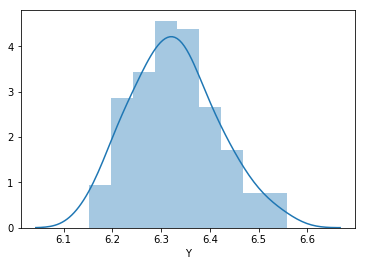

In [21]:
sns.distplot(df_CD['Y']);
print("Skewness: %f" % df_CD['Y'].skew())
print("Kurtosis: %f" % df_CD['Y'].kurt())

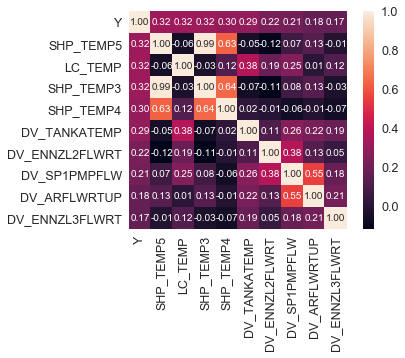

In [22]:
corrmat_df_CD = df_CD.corr()
k = 10 #number ofvariables for heatmap
cols = corrmat_df_CD.nlargest(k, 'Y')['Y'].index
cm = np.corrcoef(df_CD[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
st=pd.DataFrame(data=corrmat_df_CD['Y']) 
st.sort_values(by="Y",ascending=False).head(20) 

Y
Y               1.000000
SHP_TEMP5       0.323653
LC_TEMP         0.322314
SHP_TEMP3       0.316998
SHP_TEMP4       0.300043
DV_TANKATEMP    0.292256
DV_ENNZL2FLWRT  0.222832
DV_SP1PMPFLW    0.213600
DV_ARFLWRTUP    0.177585
DV_ENNZL3FLWRT  0.172365
DV_ENNZL1FLWRT  0.158887
SHP_TEMP6       0.158571
SCANSPEED       0.149683
DV_DWSPFLWRTR2  0.127316
LPL             0.087497
SHP_TEMP1       0.077372
LPR             0.075058
DV_ARFLWRTLW    0.071808
TMPP            0.067290
DV_SP3PMPFLW    0.061835

In [24]:
df_CD.isnull().sum()[df_CD.isnull().sum()>0]

Series([], dtype: int64)

In [25]:
#------5.2 創建數據-------#
train_x=df_CD.drop(columns=['Y']) #特徵(feature)
train_y=df_CD['Y']                #目標(Target)

#------5.3 建立模型-------#
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=42)

In [26]:
X_train

XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
29     6P0B39694           17.4            2.0           1.08           1.06   
113    6P0B4LT5A           17.4            2.0           1.08           1.06   
329    6P0B5AP34           17.4            2.0           1.08           1.06   
366    6P0B5CH84           17.4            2.0           1.08           1.06   
98     6P0B4J854           17.4            2.0           1.08           1.06   
..           ...            ...            ...            ...            ...   
798    6P0B74U8A           17.4            2.0           1.08           1.06   
40     6P0B3B01A           17.4            2.0           1.08           1.06   
636    6P0B67E8A           17.4            2.0           1.08           1.06   
246    6P0B5616A           17.4            2.0           1.08           1.06   
786    6P0B7497A           17.4            2.0           1.08           1.06   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP  LC_HUM  SHP_TEMP1  ...  AIRCOL2  \
29            79.9          3.2     22.8    58.0      110.1  ...      0.7   
113           80.0          3.1     22.8    58.0      110.2  ...      0.7   
329           80.0          3.2     22.6    59.0      110.1  ...      0.7   
366           80.0          3.1     22.6    59.0      110.1  ...      0.7   
98            79.9          3.1     22.8    59.0      110.1  ...      0.7   
..             ...          ...      ...     ...        ...  ...      ...   
798           80.0          3.1     22.7    58.0      110.1  ...      0.7   
40            80.0          3.1     22.7    59.0      110.1  ...      0.7   
636           80.0          3.1     23.0    57.0      110.1  ...      0.7   
246           80.0          3.1     22.7    59.0      110.1  ...      0.7   
786           80.0          3.2     22.7    59.0      110.1  ...      0.7   

     AIRN2  VAC  LPILL  LPILR  LPILA   LPL   LPR  SCANSPEED  ILLM_AVG  
29     0.7  -87   3308   3218   3325  7380  7209      179.0   4423.03  
113    0.7  -86   3188   3135   3328  7749  7727      175.0   4423.11  
329    0.7  -85   3330   3110   3306  7393  7129      175.0   4431.49  
366    0.7  -85   3271   3118   3306  7310  7273      183.0   4431.49  
98     0.7  -86   3191   3169   3328  7673  7659      175.0   4422.74  
..     ...  ...    ...    ...    ...   ...   ...        ...       ...  
798    0.7  -86   3345   3296   3354  6638  6609      175.0   4424.21  
40     0.7  -87   3262   3162   3328  7483  7280      183.0   4421.88  
636    0.7  -87   3242   3015   3269  7822  7693      178.0   4428.26  
246    0.7  -85   3328   3188   3306  7051  6990      183.0   4427.88  
786    0.7  -86   3242   2986   3269  8262  8044      175.0   4425.02  

[81 rows x 62 columns]

In [27]:
X_test

XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
577    910B63L9A           17.4            2.0           1.08           1.06   
24     6P0B38Q5A           17.4            2.0           1.08           1.06   
158    6P0B4RK84           17.4            2.0           1.08           1.06   
154    6P0B4RA04           17.4            2.0           1.08           1.06   
32     910B3995A           17.4            2.0           1.08           1.06   
220    6P0B54A7A           17.4            2.0           1.08           1.06   
808    6P0B76B7A           17.4            2.0           1.08           1.06   
119    6P0B4LT7A           17.4            2.0           1.08           1.06   
473    6P0B5HM24           17.4            2.0           1.08           1.06   
33     910B39954           17.4            2.0           1.08           1.06   
203    6P0B53F0A           17.4            2.0           1.08           1.06   
96     6P0B4J85A           17.4            2.0           1.08           1.06   
640    6P0B65W0A           17.4            2.0           1.08           1.06   
254    6P0B55U2A           17.4            2.0           1.08           1.06   
46     6P0B3B80A           17.4            2.0           1.08           1.06   
0      6P0B3504A           17.4            2.0           1.08           1.06   
267    6P0B57C54           17.4            2.0           1.08           1.06   
602    6P0B6597A           17.4            2.0           1.08           1.06   
801    6P0B74U54           17.4            2.0           1.08           1.06   
782    6P0B73Y7A           17.4            2.0           1.08           1.06   
637    6P0B67E81           17.4            2.0           1.08           1.06   
609    6P0B65R5A           17.4            2.0           1.08           1.06   
429    910B5FA9A           17.4            2.0           1.08           1.06   
36     910B3A96A           17.4            2.0           1.08           1.06   
41     6P0B3B014           17.4            2.0           1.08           1.06   
430    910B5FA94           17.4            2.0           1.08           1.06   
111    6P0B4LH1A           17.4            2.0           1.08           1.06   
85     6P0B3H45A           17.4            2.0           1.08           1.06   
266    6P0B57C5A           17.4            2.0           1.08           1.06   
83     6P0B3GT4A           17.4            2.0           1.08           1.06   
298    6P0B59264           17.4            2.0           1.08           1.06   
907    6P0B7BZ0A           17.4            2.0           1.08           1.06   
541    910B61574           17.4            2.0           1.08           1.06   
100    6P0B4JB04           17.4            2.0           1.08           1.06   
578    910B63L94           17.4            2.0           1.08           1.06   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP  LC_HUM  SHP_TEMP1  ...  AIRCOL2  \
577           79.9          3.1     22.7    59.0      110.1  ...      0.7   
24            80.0          3.1     22.8    58.0      110.1  ...      0.7   
158           80.0          3.2     22.7    59.0      110.1  ...      0.7   
154           80.0          3.1     22.8    58.0      110.1  ...      0.7   
32            80.0          3.1     22.8    59.0      110.1  ...      0.7   
220           80.0          3.1     22.7    60.0      110.1  ...      0.7   
808           80.0          3.1     22.8    58.0      110.1  ...      0.7   
119           79.9          3.2     22.7    58.0      110.2  ...      0.7   
473           80.0          3.1     22.7    59.0      110.1  ...      0.7   
33            79.9          3.1     22.7    58.0      110.1  ...      0.7   
203           80.0          3.1     22.6    59.0      110.1  ...      0.7   
96            79.9          3.1     22.7    59.0      110.1  ...      0.7   
640           80.0          3.1     23.2    57.0      110.1  ...      0.7   
254           80.0          3.1     22.7    5

In [28]:
#----4.1 數值型資料，做標準化-----#
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

for i in X_train.columns:
    if X_train[i].dtype != 'object':
        X_train[i] = scaler.fit_transform(X_train[[i]])
        X_test[i] = scaler.transform(X_test[[i]])
X_train

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
29     6P0B39694            0.0            0.0            0.0            0.0   
113    6P0B4LT5A            0.0            0.0            0.0            0.0   
329    6P0B5AP34            0.0            0.0            0.0            0.0   
366    6P0B5CH84            0.0            0.0            0.0            0.0   
98     6P0B4J854            0.0            0.0            0.0            0.0   
..           ...            ...            ...            ...            ...   
798    6P0B74U8A            0.0            0.0            0.0            0.0   
40     6P0B3B01A            0.0            0.0            0.0            0.0   
636    6P0B67E8A            0.0            0.0            0.0            0.0   
246    6P0B5616A            0.0            0.0            0.0            0.0   
786    6P0B7497A            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  ...  AIRCOL2  \
29             0.0          1.0    0.375  0.333333        0.5  ...      0.0   
113            0.5          0.5    0.375  0.333333        1.0  ...      0.0   
329            0.5          1.0    0.125  0.666667        0.5  ...      0.0   
366            0.5          0.5    0.125  0.666667        0.5  ...      0.0   
98             0.0          0.5    0.375  0.666667        0.5  ...      0.0   
..             ...          ...      ...       ...        ...  ...      ...   
798            0.5          0.5    0.250  0.333333        0.5  ...      0.0   
40             0.5          0.5    0.250  0.666667        0.5  ...      0.0   
636            0.5          0.5    0.625  0.000000        0.5  ...      0.0   
246            0.5          0.5    0.250  0.666667        0.5  ...      0.0   
786            0.5          1.0    0.250  0.666667        0.5  ...      0.0   

     AIRN2   VAC     LPILL     LPILR     LPILA       LPL       LPR  SCANSPEED  \
29     0.0  0.25  0.757764  0.757764  0.655914  0.448338  0.418367   0.692308   
113    0.0  0.50  0.012422  0.500000  0.688172  0.671299  0.770748   0.384615   
329    0.0  0.75  0.894410  0.422360  0.451613  0.456193  0.363946   0.384615   
366    0.0  0.75  0.527950  0.447205  0.451613  0.406042  0.461905   1.000000   
98     0.0  0.50  0.031056  0.605590  0.688172  0.625378  0.724490   0.384615   
..     ...   ...       ...       ...       ...       ...       ...        ...   
798    0.0  0.50  0.987578  1.000000  0.967742  0.000000  0.010204   0.384615   
40     0.0  0.25  0.472050  0.583851  0.688172  0.510574  0.466667   1.000000   
636    0.0  0.25  0.347826  0.127329  0.053763  0.715408  0.747619   0.615385   
246    0.0  0.75  0.881988  0.664596  0.451613  0.249547  0.269388   1.000000   
786    0.0  0.50  0.347826  0.037267  0.053763  0.981269  0.986395   0.384615   

     ILLM_AVG  
29   0.119667  
113  0.127992  
329  1.000000  
366  1.000000  
98   0.089490  
..        ...  
798  0.242456  
40   0.000000  
636  0.663892  
246  0.624350  
786  0.326743  

[81 rows x 62 columns]

In [29]:
X_test

XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
577    910B63L9A            0.0            0.0            0.0            0.0   
24     6P0B38Q5A            0.0            0.0            0.0            0.0   
158    6P0B4RK84            0.0            0.0            0.0            0.0   
154    6P0B4RA04            0.0            0.0            0.0            0.0   
32     910B3995A            0.0            0.0            0.0            0.0   
220    6P0B54A7A            0.0            0.0            0.0            0.0   
808    6P0B76B7A            0.0            0.0            0.0            0.0   
119    6P0B4LT7A            0.0            0.0            0.0            0.0   
473    6P0B5HM24            0.0            0.0            0.0            0.0   
33     910B39954            0.0            0.0            0.0            0.0   
203    6P0B53F0A            0.0            0.0            0.0            0.0   
96     6P0B4J85A            0.0            0.0            0.0            0.0   
640    6P0B65W0A            0.0            0.0            0.0            0.0   
254    6P0B55U2A            0.0            0.0            0.0            0.0   
46     6P0B3B80A            0.0            0.0            0.0            0.0   
0      6P0B3504A            0.0            0.0            0.0            0.0   
267    6P0B57C54            0.0            0.0            0.0            0.0   
602    6P0B6597A            0.0            0.0            0.0            0.0   
801    6P0B74U54            0.0            0.0            0.0            0.0   
782    6P0B73Y7A            0.0            0.0            0.0            0.0   
637    6P0B67E81            0.0            0.0            0.0            0.0   
609    6P0B65R5A            0.0            0.0            0.0            0.0   
429    910B5FA9A            0.0            0.0            0.0            0.0   
36     910B3A96A            0.0            0.0            0.0            0.0   
41     6P0B3B014            0.0            0.0            0.0            0.0   
430    910B5FA94            0.0            0.0            0.0            0.0   
111    6P0B4LH1A            0.0            0.0            0.0            0.0   
85     6P0B3H45A            0.0            0.0            0.0            0.0   
266    6P0B57C5A            0.0            0.0            0.0            0.0   
83     6P0B3GT4A            0.0            0.0            0.0            0.0   
298    6P0B59264            0.0            0.0            0.0            0.0   
907    6P0B7BZ0A            0.0            0.0            0.0            0.0   
541    910B61574            0.0            0.0            0.0            0.0   
100    6P0B4JB04            0.0            0.0            0.0            0.0   
578    910B63L94            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  ...  AIRCOL2  \
577            0.0          0.5    0.250  0.666667        0.5  ...      0.0   
24             0.5          0.5    0.375  0.333333        0.5  ...      0.0   
158            0.5          1.0    0.250  0.666667        0.5  ...      0.0   
154            0.5          0.5    0.375  0.333333        0.5  ...      0.0   
32             0.5          0.5    0.375  0.666667        0.5  ...      0.0   
220            0.5          0.5    0.250  1.000000        0.5  ...      0.0   
808            0.5          0.5    0.375  0.333333        0.5  ...      0.0   
119            0.0          1.0    0.250  0.333333        1.0  ...      0.0   
473            0.5          0.5    0.250  0.666667        0.5  ...      0.0   
33             0.0          0.5    0.250  0.333333        0.5  ...      0.0   
203            0.5          0.5    0.125  0.666667        0.5  ...      0.0   
96             0.0          0.5    0.250  0.666667        0.5  ...      0.0   
640            0.5          0.5    0.875  0.000000        0.5  ...      0.0   
254            0.

In [30]:
X_train = X_train.drop('XML_SHEET_ID',1)
X_test = X_test.drop('XML_SHEET_ID',1)
X_train

LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
29             0.0            0.0            0.0            0.0   
113            0.0            0.0            0.0            0.0   
329            0.0            0.0            0.0            0.0   
366            0.0            0.0            0.0            0.0   
98             0.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
798            0.0            0.0            0.0            0.0   
40             0.0            0.0            0.0            0.0   
636            0.0            0.0            0.0            0.0   
246            0.0            0.0            0.0            0.0   
786            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  SHP_TEMP2  ...  \
29             0.0          1.0    0.375  0.333333        0.5   0.666667  ...   
113            0.5          0.5    0.375  0.333333        1.0   0.666667  ...   
329            0.5          1.0    0.125  0.666667        0.5   1.000000  ...   
366            0.5          0.5    0.125  0.666667        0.5   0.666667  ...   
98             0.0          0.5    0.375  0.666667        0.5   0.666667  ...   
..             ...          ...      ...       ...        ...        ...  ...   
798            0.5          0.5    0.250  0.333333        0.5   0.333333  ...   
40             0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
636            0.5          0.5    0.625  0.000000        0.5   0.666667  ...   
246            0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
786            0.5          1.0    0.250  0.666667        0.5   0.666667  ...   

     AIRCOL2  AIRN2   VAC     LPILL     LPILR     LPILA       LPL       LPR  \
29       0.0    0.0  0.25  0.757764  0.757764  0.655914  0.448338  0.418367   
113      0.0    0.0  0.50  0.012422  0.500000  0.688172  0.671299  0.770748   
329      0.0    0.0  0.75  0.894410  0.422360  0.451613  0.456193  0.363946   
366      0.0    0.0  0.75  0.527950  0.447205  0.451613  0.406042  0.461905   
98       0.0    0.0  0.50  0.031056  0.605590  0.688172  0.625378  0.724490   
..       ...    ...   ...       ...       ...       ...       ...       ...   
798      0.0    0.0  0.50  0.987578  1.000000  0.967742  0.000000  0.010204   
40       0.0    0.0  0.25  0.472050  0.583851  0.688172  0.510574  0.466667   
636      0.0    0.0  0.25  0.347826  0.127329  0.053763  0.715408  0.747619   
246      0.0    0.0  0.75  0.881988  0.664596  0.451613  0.249547  0.269388   
786      0.0    0.0  0.50  0.347826  0.037267  0.053763  0.981269  0.986395   

     SCANSPEED  ILLM_AVG  
29    0.692308  0.119667  
113   0.384615  0.127992  
329   0.384615  1.000000  
366   1.000000  1.000000  
98    0.384615  0.089490  
..         ...       ...  
798   0.384615  0.242456  
40    1.000000  0.000000  
636   0.615385  0.663892  
246   1.000000  0.624350  
786   0.384615  0.326743  

[81 rows x 61 columns]

In [31]:
X_test

LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
577            0.0            0.0            0.0            0.0   
24             0.0            0.0            0.0            0.0   
158            0.0            0.0            0.0            0.0   
154            0.0            0.0            0.0            0.0   
32             0.0            0.0            0.0            0.0   
220            0.0            0.0            0.0            0.0   
808            0.0            0.0            0.0            0.0   
119            0.0            0.0            0.0            0.0   
473            0.0            0.0            0.0            0.0   
33             0.0            0.0            0.0            0.0   
203            0.0            0.0            0.0            0.0   
96             0.0            0.0            0.0            0.0   
640            0.0            0.0            0.0            0.0   
254            0.0            0.0            0.0            0.0   
46             0.0            0.0            0.0            0.0   
0              0.0            0.0            0.0            0.0   
267            0.0            0.0            0.0            0.0   
602            0.0            0.0            0.0            0.0   
801            0.0            0.0            0.0            0.0   
782            0.0            0.0            0.0            0.0   
637            0.0            0.0            0.0            0.0   
609            0.0            0.0            0.0            0.0   
429            0.0            0.0            0.0            0.0   
36             0.0            0.0            0.0            0.0   
41             0.0            0.0            0.0            0.0   
430            0.0            0.0            0.0            0.0   
111            0.0            0.0            0.0            0.0   
85             0.0            0.0            0.0            0.0   
266            0.0            0.0            0.0            0.0   
83             0.0            0.0            0.0            0.0   
298            0.0            0.0            0.0            0.0   
907            0.0            0.0            0.0            0.0   
541            0.0            0.0            0.0            0.0   
100            0.0            0.0            0.0            0.0   
578            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  SHP_TEMP2  ...  \
577            0.0          0.5    0.250  0.666667        0.5   0.666667  ...   
24             0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
158            0.5          1.0    0.250  0.666667        0.5   0.333333  ...   
154            0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
32             0.5          0.5    0.375  0.666667        0.5   0.666667  ...   
220            0.5          0.5    0.250  1.000000        0.5   0.333333  ...   
808            0.5          0.5    0.375  0.333333        0.5   0.333333  ...   
119            0.0          1.0    0.250  0.333333        1.0   0.666667  ...   
473            0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
33             0.0          0.5    0.250  0.333333        0.5   0.666667  ...   
203            0.5          0.5    0.125  0.666667        0.5   0.666667  ...   
96             0.0          0.5    0.250  0.666667        0.5   0.666667  ...   
640            0.5          0.5    0.875  0.000000        0.5   0.666667  ...   
254            0.5          0.5    0.250  0.666667        1.0   0.666667  ...   
46             0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
0              0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
267            0.5          1.0    0.125  0.666667        0.5   0.333333  ...   
602            0.5          0.5    0.500  0.333333        0.5   0.333333  ...   
801            0.0          1.0    0.375  0.666667   

In [32]:
#建立lasso預測模型
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X_train.columns)

In [34]:
FI_lasso.sort_values("Feature Importance",ascending=False)

Feature Importance
SHP_TEMP5                 0.105068
DV_TANKATEMP              0.103473
SCANSPEED                 0.090654
DV_ENNZL2FLWRT            0.055868
DV_ARFLWRTLW              0.052552
...                            ...
HUMM                     -0.040241
LC_HUM                   -0.054146
VAC                      -0.055291
LPAVE                    -0.084282
SHP_TEMP2                -0.148912

[61 rows x 1 columns]

In [36]:
lasso_top3 = FI_lasso.abs().sort_values("Feature Importance",ascending=False).head(4)
lasso_top3

Feature Importance
SHP_TEMP2               0.148912
SHP_TEMP5               0.105068
DV_TANKATEMP            0.103473
SCANSPEED               0.090654

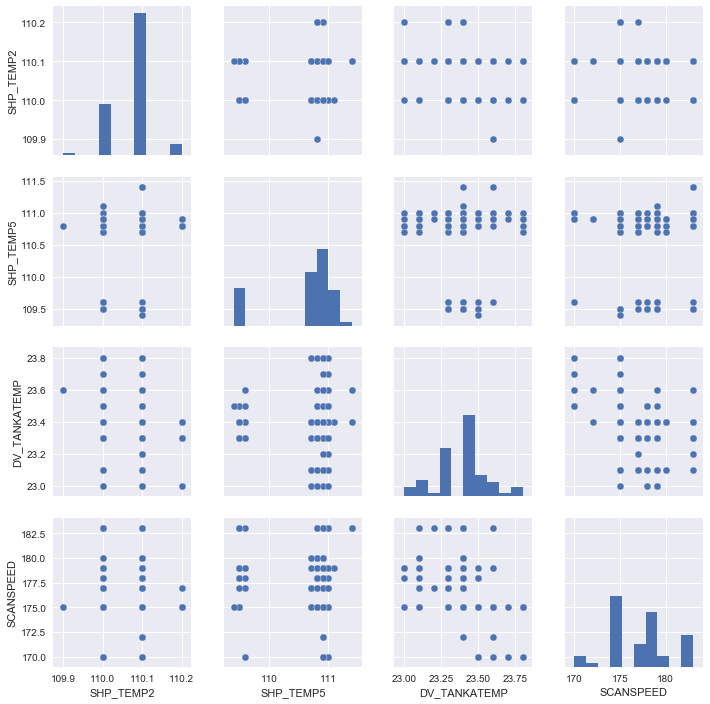

In [38]:
sns.set()
#cols = FI_lasso.sort_values("Feature Importance",ascending=False).head(4).index
sns_plot = sns.pairplot(df_CD[lasso_top3.index], size = 2.5)
#sns_plot.show();
sns_plot.savefig("pairplot2.jpg")

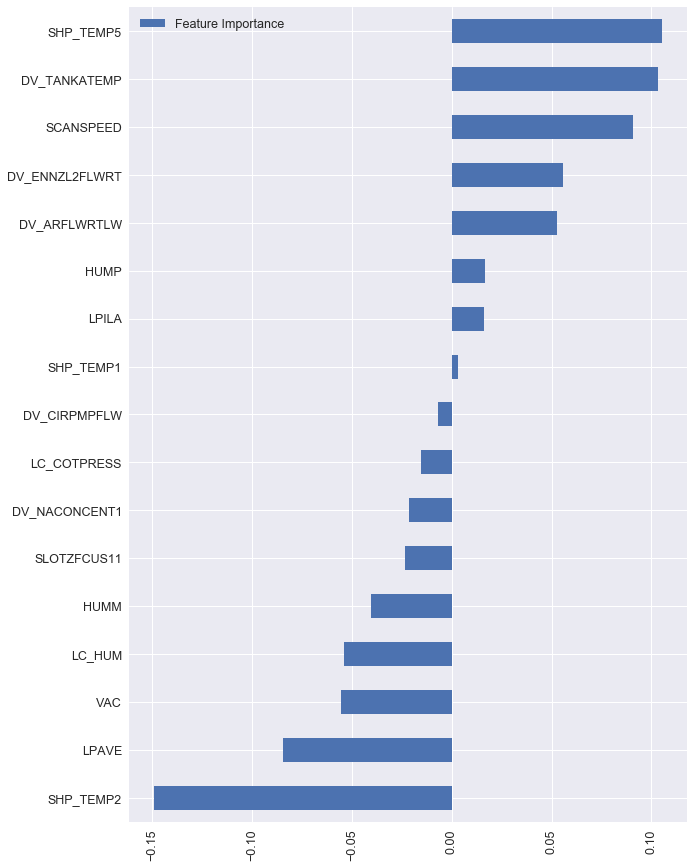

In [71]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(10,15))
plt.xticks(rotation=90)
plt.show()

In [72]:
#先用x train看預測出來的y train結果多少
lasso.predict(X_train)

array([6.35029179, 6.3090311 , 6.19556818, 6.34988033, 6.30217555,
       6.3365653 , 6.33297095, 6.37303857, 6.45830718, 6.34020548,
       6.40276523, 6.2654501 , 6.3844759 , 6.40219621, 6.30099019,
       6.37912227, 6.3053489 , 6.2801892 , 6.39117589, 6.32118264,
       6.26519827, 6.40394639, 6.27820241, 6.47859645, 6.22832838,
       6.33006415, 6.35261962, 6.32024367, 6.26290298, 6.35084862,
       6.28050047, 6.31991647, 6.304609  , 6.25206472, 6.38366617,
       6.40969819, 6.2617833 , 6.37641575, 6.39814867, 6.28161095,
       6.268635  , 6.31353959, 6.28643389, 6.27249433, 6.27203109,
       6.36904363, 6.31943487, 6.30290695, 6.27846414, 6.30703479,
       6.40964927, 6.29943199, 6.40435364, 6.27764604, 6.35118835,
       6.31518274, 6.25257867, 6.36160877, 6.27565748, 6.29162651,
       6.48676432, 6.30741672, 6.35345105, 6.31599688, 6.30325731,
       6.32928793, 6.47487916, 6.36911796, 6.44456541, 6.29667858,
       6.35706685, 6.35491291, 6.32132449, 6.38740399, 6.33501

In [73]:
#實際答案
y_train

29     6.385
113    6.242
329    6.211
366    6.366
98     6.282
       ...  
798    6.486
40     6.486
636    6.559
246    6.297
786    6.437
Name: Y, Length: 81, dtype: float64

In [74]:
#再用test看預測出來的y train結果多少
lasso.predict(X_test)

array([6.2843636 , 6.37316648, 6.36066736, 6.29953702, 6.36063488,
       6.24734494, 6.29542034, 6.28146595, 6.37667614, 6.36090011,
       6.32471629, 6.30868433, 6.43135036, 6.38197516, 6.27441   ,
       6.33096267, 6.28194127, 6.35046576, 6.32547089, 6.32849369,
       6.41251199, 6.28261569, 6.25988916, 6.28843476, 6.40684782,
       6.29531335, 6.34741859, 6.29389483, 6.28206493, 6.28458517,
       6.28802737, 6.37286754, 6.36247096, 6.35931791, 6.30378124])

In [75]:
y_test

577    6.152
24     6.399
158    6.350
154    6.254
32     6.393
220    6.155
808    6.220
119    6.201
473    6.402
33     6.314
203    6.203
96     6.263
640    6.465
254    6.260
46     6.264
0      6.218
267    6.151
602    6.360
801    6.356
782    6.342
637    6.401
609    6.228
429    6.206
36     6.263
41     6.426
430    6.329
111    6.317
85     6.356
266    6.275
83     6.345
298    6.401
907    6.280
541    6.324
100    6.418
578    6.252
Name: Y, dtype: float64

In [76]:
def mae_value(y_true, y_pred):
   #""引數: y_true -- 測試集目標真實值
   # y_pred -- 測試集目標預測值
   # 
   # 返回:
   # mae -- MAE 評價指標
    
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred))/n
    return mae

def mse_value(y_true, y_pred):
    #"""引數:
    #y_true -- 測試集目標真實值
    #y_pred -- 測試集目標預測值  
   # 返回:
   # mse -- MSE 評價指標
    
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    return mse

def mape(y_true, y_pred):
    #"""
    #引數: 
    #y_true -- 測試集目標真實值
    #y_pred -- 測試集目標預測值
    
    #返回:
    #mape -- MAPE 評價指標    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

In [77]:
#MAE的值越小，說明預測模型擁有更好的精確度。
print(mae_value(lasso.predict(X_train), y_train)) 
#MSE的值越小，說明預測模型擁有更好的精確度。
print(mse_value(lasso.predict(X_train), y_train))
#MAPE的值越小，說明預測模型擁有更好的精確度。(單位:%)
print(mape(lasso.predict(X_train), y_train))

0.03692433052322667
0.002241445974425214
0.5819181579636157


In [78]:
print(mae_value(lasso.predict(X_test), y_test))
print(mse_value(lasso.predict(X_test), y_test))
print(mape(lasso.predict(X_test), y_test))

0.054605692457947184
0.004420806357156868
0.8644906348622814


In [79]:
from sklearn.metrics import r2_score
r2_score(lasso.predict(X_train), y_train)

0.38499911005803367

In [80]:
#r2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
r2_score(lasso.predict(X_test), y_test)

-1.089555050864563